In [1]:
import pandas as pd 
import os 
import requests
import json 
import matplotlib.pyplot as plt

In [2]:
nypd_shootings=pd.read_csv('data/nypd.csv',encoding="ISO-8859-1")
nypd_shootings

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,169180023,09/09/2017,3:57:00,STATEN ISLAND,120,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,959975,171772,40.638126,-74.087467
1,169180027,09/09/2017,22:15:00,BRONX,50,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK HISPANIC,1011288,255912,40.869061,-73.902242
2,169180025,09/09/2017,18:35:00,BROOKLYN,79,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,18-24,M,BLACK,999888,193014,40.696450,-73.943607
3,169180024,09/09/2017,15:20:00,BROOKLYN,67,0.0,NaN,False,18-24,M,BLACK,18-24,M,BLACK,997784,172132,40.639137,-73.951236
4,169180022,09/09/2017,0:20:00,BROOKLYN,61,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,25-44,M,ASIAN / PACIFIC ISLANDER,1001019,156467,40.596134,-73.939619
5,156603440,09/09/2016,20:58:00,BROOKLYN,67,0.0,MULTI DWELL - APT BUILD,False,25-44,M,BLACK,<18,M,BLACK,1003592,176432,40.650929,-73.930297
6,156603439,09/09/2016,20:43:00,BRONX,41,0.0,NaN,False,NaN,NaN,NaN,25-44,M,WHITE HISPANIC,1011370,235889,40.814103,-73.902027
7,156603438,09/09/2016,11:50:00,MANHATTAN,32,0.0,NaN,False,NaN,NaN,NaN,<18,M,BLACK,1001664,239682,40.824538,-73.937081
8,156552658,09/09/2016,0:18:00,QUEENS,113,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,1044416,183458,40.670030,-73.783113
9,146014287,09/09/2015,23:08:00,BRONX,47,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,25-44,M,BLACK,1026323,261252,40.883658,-73.847848


In [3]:
nypd_date=pd.concat([nypd_shootings.drop('OCCUR_DATE', axis = 1), 
          (nypd_shootings.OCCUR_DATE.str.split("/|T").str[:3].apply(pd.Series)
          .rename(columns={0:'month', 1:'day', 2:'year'}))], axis = 1)
nypd_date.head()

,INCIDENT_KEY,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,month,day,year
0,169180023,3:57:00,STATEN ISLAND,120,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,959975,171772,40.638126,-74.087467,09,09,2017
1,169180027,22:15:00,BRONX,50,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK HISPANIC,1011288,255912,40.869061,-73.902242,09,09,2017
2,169180025,18:35:00,BROOKLYN,79,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,18-24,M,BLACK,999888,193014,40.696450,-73.943607,09,09,2017
3,169180024,15:20:00,BROOKLYN,67,0.0,NaN,False,18-24,M,BLACK,18-24,M,BLACK,997784,172132,40.639137,-73.951236,09,09,2017
4,169180022,0:20:00,BROOKLYN,61,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,25-44,M,ASIAN / PACIFIC ISLANDER,1001019,156467,40.596134,-73.939619,09,09,2017


In [4]:
nyc_shootings=nypd_date.rename(columns={'INCIDENT_KEY':'Incident Key',
                                       'BORO':'Borough','STATISTICAL_MURDER_FLAG':'Resulted in Murder',
                                       'year':'Year'})
nyc_shootings=nyc_shootings[['Incident Key','Borough','Resulted in Murder','Year']]
nyc_shootings.head()

,Incident Key,Borough,Resulted in Murder,Year
0,169180023,STATEN ISLAND,False,2017
1,169180027,BRONX,False,2017
2,169180025,BROOKLYN,False,2017
3,169180024,BROOKLYN,False,2017
4,169180022,BROOKLYN,False,2017


In [5]:
brooklyn_shootings=nyc_shootings.loc[nyc_shootings['Borough']=='BROOKLYN']
brooklyn_shootings.head()

,Incident Key,Borough,Resulted in Murder,Year
2,169180025,BROOKLYN,False,2017
3,169180024,BROOKLYN,False,2017
4,169180022,BROOKLYN,False,2017
5,156603440,BROOKLYN,False,2016
11,146013532,BROOKLYN,True,2015


In [6]:
bk_shootings=brooklyn_shootings[['Incident Key','Resulted in Murder','Year']]
bk_shootings.head()

,Incident Key,Resulted in Murder,Year
2,169180025,False,2017
3,169180024,False,2017
4,169180022,False,2017
5,156603440,False,2016
11,146013532,True,2015


In [28]:
shoot_counts = bk_shootings['Incident Key'].count()
shoot_counts

Year  Resulted in Murder
2006  False                 674
      True                  176
2007  False                 656
      True                  177
2008  False                 627
      True                  158
2009  False                 614
      True                  156
2010  False                 623
      True                  182
2011  False                 686
      True                  153
2012  False                 541
      True                  110
2013  False                 489
      True                  104
2014  False                 529
      True                   85
2015  False                 464
      True                  119
2016  False                 393
      True                  106
2017  False                 288
      True                   69
2018  False                 294
      True                   68
Name: Incident Key, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

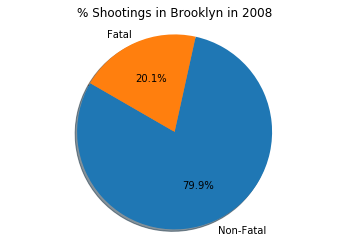

In [37]:
chosen_year='2008'

bk_type=shoot_counts.loc[chosen_year]

labes=['Non-Fatal','Fatal']
plt.pie(bk_type,autopct="%1.1f%%",labels=labels,shadow=True,startangle=150)
plt.title('% Shootings in Brooklyn in 2008')
plt.axis("equal")
plt.savefig('data/2008shots.png')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

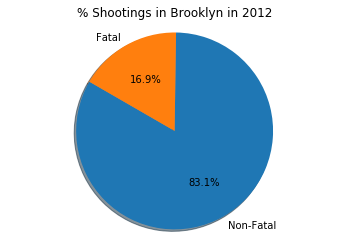

In [38]:
chosen_year='2012'

bk_type=shoot_counts.loc[chosen_year]

labes=['Non-Fatal','Fatal']
plt.pie(bk_type,autopct="%1.1f%%",labels=labels,shadow=True,startangle=150)
plt.title('% Shootings in Brooklyn in 2012')
plt.axis("equal")
plt.savefig('data/2012shots.png')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

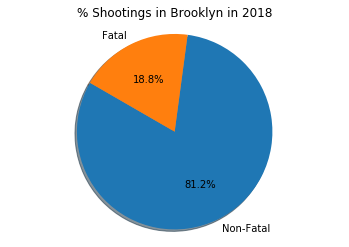

In [39]:
chosen_year='2018'

bk_type=shoot_counts.loc[chosen_year]

labes=['Non-Fatal','Fatal']
plt.pie(bk_type,autopct="%1.1f%%",labels=labels,shadow=True,startangle=150)
plt.title('% Shootings in Brooklyn in 2018')
plt.axis("equal")
plt.savefig('data/2018shots.png')
plt.show